# <center> Formation à la manipulation de données textuelles en Python </center>
## <center>  Jean-Philippe Magué (ENS de Lyon) - Julien Velin (Université Lumière Lyon 2) </center> 

# Analyse du lexique propre à chaque laboratoire

Dans cette 3ème partie, nous allons nous intéressé à la fréquence des lemmes dans les desciptifs de chaque laboratoire. Notre objectif est degager les termes propres à chacunn d'entre eux.

## Décompte du nombre d'occurrennces
Voici plusieurs manière de compter le nombre d'occurrences des mots d'un document

### Complètemenent à la main:

In [34]:
nOcc={}
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemme=lemme.strip()
        if lemme not in nOcc:
            nOcc[lemme]=0
        nOcc[lemme]+=1

### Un peu moins à la main, en utilisant un [defaultdict](https://docs.python.org/fr/3/library/collections.html#collections.defaultdict)

In [36]:
from collections import defaultdict

In [37]:
nOcc=defaultdict(int)
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemme=lemme.strip()
        nOcc[lemme]+=1

### Encore moins à la main, en utilisant un [Counter](https://docs.python.org/fr/3/library/collections.html#collections.Counter)

In [43]:
from collections import Counter

In [38]:
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    nOcc=Counter(f)
nOcc

In [41]:
lemmes=[]
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    for lemme in f:
        lemmes.append(lemme.strip())
nOcc=Counter(lemmes)

In [ ]:
with open('labos/IAO/lemmes.txt', encoding='utf8') as f:
    nOcc=Counter([lemme.strip() for lemme in f])
nOcc

### Automatiquement, avec un [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) proposé par la bibliothèque [Scikit Learn](https://scikit-learn.org/stable/)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
counter=CountVectorizer()
with open('labos/IAO/lemmes.txt') as f:
    nOcc=counter.fit_transform([f.read()])

In [58]:
nOcc.toarray()

array([[ 1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  2,  2,  1,  1,  3,  1,
         2,  1,  1,  2,  2,  1,  2,  1,  1,  1,  1,  4, 23,  1,  1,  2,
         2,  1,  2,  1,  1,  1,  1,  1, 14,  1,  2, 17,  1,  1,  2,  1,
         1,  2,  1,  1,  1,  3,  5,  1,  1,  1,  1,  2,  1,  1,  1,  2,
         1,  1,  2,  3, 13,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
         1,  1,  2,  4,  1,  1,  2,  1,  1,  1,  1,  6,  3,  1,  3,  1,
         1,  1,  1,  1,  1,  1,  5,  1,  1,  4,  1,  1,  1,  2,  1,  1,
        11,  1,  1,  2,  1,  2,  3]])

In [59]:
counter.get_feature_names_out()

array(['1992', '2002', '5062', 'accès', 'acquérir', 'activité', 'ainsi',
       'analyse', 'anthropologie', 'asean', 'asiatique', 'asie',
       'associer', 'atteindre', 'avec', 'avoir', 'base', 'campus', 'ce',
       'centre', 'chercheur', 'chine', 'chinois', 'cnrs', 'compétence',
       'conjoint', 'corée', 'dans', 'de', 'depuis', 'descartes',
       'différent', 'doctorant', 'documentation', 'domaine', 'donnée',
       'dont', 'droit', 'développer', 'ecole', 'en', 'entretien', 'est',
       'et', 'europe', 'excellence', 'expertise', 'fonder', 'formation',
       'fort', 'géographie', 'géographique', 'histoire', 'humain', 'iao',
       'iconographique', 'ii', 'iii', 'indonésien', 'information',
       'installer', 'institut', 'institution', 'interaction', 'iv',
       'japon', 'japonais', 'langue', 'le', 'linguistique', 'littérature',
       'lyon', 'matière', 'maîtrise', 'mission', 'monde', 'national',
       'normale', 'objectif', 'occidental', 'oriental', 'outre', 'par',
       'p

### Exercice 3.1
Construire un DataFrame qui donne pour chaque laboratoire le nombre de d'occurrences de chaque lemme

![](images/doc_term_mat.png)

On appelle ce tableau **matrice document - terme** (*document term matrix*) ou encore **table lexicale**

In [ ]:
import pandas as pd


## Recherche du vocabulaire le plus caractéristique de chaque labo
### Recherche des lemmes les plus fréquents

#### Exercice 3.2
Quels sont les 5 lemmes les plus fréquents pour le laboratoire LADEC ? Pour DIPHE? Pour CERCOR ?

#### Exercice 3.3
Cacluler le nombre d'occurrences de tous les lemmes, tous laboratoires confondus. Quel est le plus fréquent ? Le plus rare ?

Plus de 55% des lemmes que l'on trouve dans le corpus d'apparaissent qu'une seule fois. On les appelles des **hapax**

Le lemme le plus fréquent, *de*, représente à lui seul plus de 11% des l'ensemble des tokens du corpus

In [245]:
import matplotlib.pyplot as plt # matplotlib est une bibliothèque permettant de faire des graphique. Pandas s'appuie sur lle pour faire ses graphique

In [274]:
range(1281,nOccTotal.shape[0])

range(1281, 2876)

Text(2000, 150, 'hapax')

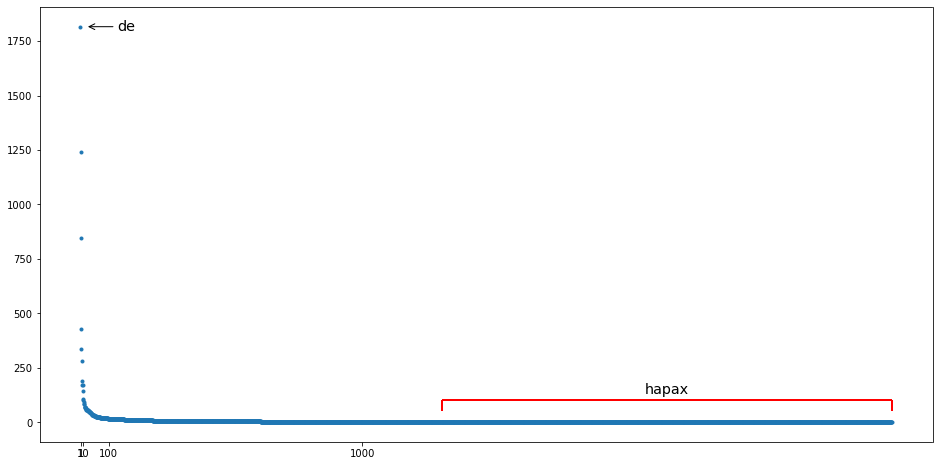

In [365]:
nOccTotal.plot(figsize=(16,8),style='.')

plt.xticks([1,10,100,1000],[1,10,100,1000]);

plt.annotate('de', xy=(20,nOccTotal.loc['de']), xytext=(130,nOccTotal.loc['de']), size='x-large',va='center', arrowprops={'arrowstyle':'->'})

plt.hlines(100, 1281, nOccTotal.shape[0], linewidth=2, color='red')
plt.vlines([1281, nOccTotal.shape[0]], 50, 100, linewidth=2, color='red')
plt.text(2000,150,'hapax',size='x-large',va='center')

Text(1500, 1.7, 'hapax')

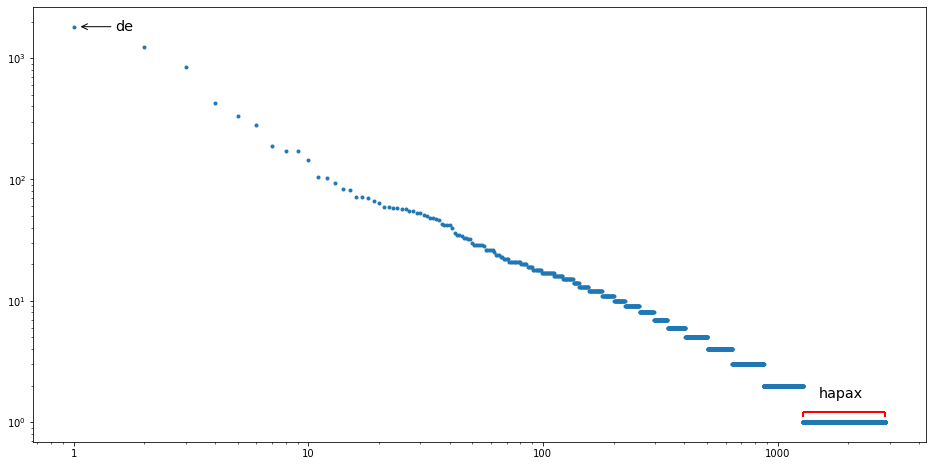

In [366]:
plt.figure(figsize=(16,8))

plt.loglog(range(1,nOccTotal.shape[0]+1), nOccTotal, '.')

plt.xticks([1,10,100,1000],[1,10,100,1000]);

plt.annotate('de', xy=(1.05,nOccTotal.loc['de']), xytext=(1.5,nOccTotal.loc['de']), size='x-large',va='center', arrowprops={'arrowstyle':'->'})

plt.hlines(1.2, 1281, nOccTotal.shape[0], linewidth=2, color='red')
plt.vlines([1281, nOccTotal.shape[0]], 1.1, 1.2, linewidth=2, color='red')
plt.text(1500,1.7,'hapax',size='x-large',va='center')

## Une mesure des termes caractérisques : [TF-IDF](https://fr.wikipedia.org/wiki/TF-IDF)
TF-IDF (Term Frequency - Inverse Document Frequecy) est une méthode qui, étant donnée une collection de documents, permet d'attribuer une mesure de l'importance de chaque terme dans chaque document. Elle repose sur l'idée suivante :

Plus un terme est fréquent dans un document, plus il est important. Mais un terme important partout est important nulle part.

TF-IDF est donc le produit de 2 termes : 

* TF : la **frequence** du terme dans le document
* IDF : (le logarithme de) l'inverse de la proportion de documents qui contiennent le terme

$$
\text{tfidf}(t,D) = \text{tf}(t,D).\text{idf}(t)
$$


$$
\text{tf}(t,D) = \frac{\text{nombre d'occurrences de }t \text{ dans } D}{\text{taille du document } D}
$$

$$
\text{idf}(t) =  \log{\frac{\text{nombre de documents}}{\text{nombre de documents avec } t}}
$$


### Exercice 3.4
Comment peut-on connaître la taille de chaque document ?

### Exercice 3.5
Calculer la fréquence de chaque lemme dans chaque document

### Exercice 3.6
Calculer pour chaque lemme le nombre de documents dans lequel il apparaît

### Exercice 3.7
Calculer IDF pour chaque lemme

Pour pouvoir calculer le logarithme, on a besoin de faire appel à la bibliothèque *[numpy](https://numpy.org/)*

### Exercice 3.8
calculer TF-IDF pour tous les termes dans tous les documents

On peut également le faire directement avec scikit learn grace à [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Attention, les [calculs](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) ne sont pas strictement identiques

In [440]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(s):
    return s.split('\n')

document&s=[]
nom_labos=[]
for fichier in fichiers:
    nom_labos.append(fichier.split('/')[1])
    with open(fichier, encoding='utf8') as f:
        documents.append(f.read())
tfidfer=TfidfVectorizer(lowercase=False,tokenizer=tokenizer) #On ne maîtrise pas bien la tokennisation de CountVectorizer !
tfidf_sklearn=tfidfer.fit_transform(documents)
tfidf_sklearn=pd.DataFrame.sparse.from_spmatrix(tfidf_sklearn,index=nom_labos,columns=tfidfer.get_feature_names_out())

In [438]:
tfidf_sklearn.head()

,,ACE,ADTL,ANC,ANR,APS,ARAR,ARCHEOLOGIE,ARTEMIS,ASEAN,...,évoluer,évolution,évènement,événement,événementiel,évêque,être,œuvr,œuvre,œuvrer
LARHRA,0.018545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.040058,0.0,0.0,0.000000
RESHAPE,0.017792,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.019216,0.0,0.0,0.000000
LVIS,0.018287,0.0,0.0,0.0,0.0,0.155732,0.0,0.0,0.0,0.000000,...,0.0,0.042282,0.0,0.0,0.0,0.0,0.079001,0.0,0.0,0.000000
IAO,0.015899,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.067699,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.051514,0.0,0.0,0.000000
CMW,0.011624,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.062775,0.0,0.0,0.049498


### Exercice 3.9
Quels sont les 5 lemmes les plus caractéristiques du laboratoire LADEC ? De DIPHE? De CERCOR ?

Dans la manière de calculer de Scikit learn, le poids des mots vide (*stop words*) reste important. Il est possible de donner à Scikit learn une liste de mots à exclure des calculs. SpaCy propose justement une telle liste

In [445]:
from spacy.lang.fr.stop_words import STOP_WORDS 
def tokenizer(s):
    return s.split('\n')

documents=[]
nom_labos=[]
for fichier in fichiers:
    nom_labos.append(fichier.split('/')[1])
    with open(fichier, encoding='utf8') as f:
        documents.append(f.read())
tfidfer=TfidfVectorizer(lowercase=False,tokenizer=tokenizer,stop_words=STOP_WORDS) #On ne maîtrise pas bien la tokennisation de CountVectorizer !
tfidf_sklearn=tfidfer.fit_transform(documents)
tfidf_sklearn=pd.DataFrame.sparse.from_spmatrix(tfidf_sklearn,index=nom_labos,columns=tfidfer.get_feature_names_out())

In [447]:
tfidf_sklearn.loc['LADEC'].sort_values(ascending=False).head(5)

ladec            0.425617
contemporain     0.246522
lyonnais         0.200265
grand            0.149479
Anthropologie    0.141872
Name: LADEC, dtype: Sparse[float64, 0]

In [450]:
tfidf_sklearn.loc['DIPHE'].sort_values(ascending=False).head(5)

handicap         0.262087
situation        0.211128
professionnel    0.181319
viser            0.176756
psychique        0.169942
Name: DIPHE, dtype: Sparse[float64, 0]

In [451]:
tfidf_sklearn.loc['CERCOR'].sort_values(ascending=False).head(5)

cercor        0.292701
religieux     0.275659
monastique    0.175621
fasti         0.175621
Analecta      0.175621
Name: CERCOR, dtype: Sparse[float64, 0]

## Nuages de mots à partir des résultats de tf idf
la bibliothèque wordcloud permet de créer des nuages du mots. La forme du nuage peut être préciser via une image noir et blanc.
Pour l'installer, copiez-collez `!conda install wordcloud` dans une cellule sur vous utilisez anaconda, `!pip install wordcloud` sinon

In [542]:
# imread est nécessaire si on souhaite utiliser un masque (image en noir et blanc, le noir indiquant où afficher le nuage)
from imageio import imread
from wordcloud import WordCloud
from tqdm.notebook import tqdm

In [ ]:
# nombre de mots à afficher
limit = 100

bgcolor = '#000000' # couleur de fond
    
for labo in tqdm(tfidf_sklearn.index):
    wordcloud = WordCloud(
        max_words=limit,
        mask=imread('images/logo_msh.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)    
        background_color=bgcolor,
    ).generate_from_frequencies(tfidf_sklearn.loc[labo])

    plt.figure(figsize=(10,15))
    plt.xticks([])
    plt.yticks([]) 
    plt.title(labo)

    plt.imshow(wordcloud)
    plt.savefig(f'labos/{labo}/nuage.png')

  0%|          | 0/51 [00:00<?, ?it/s]

/var/folders/15/c_zgb6zs29s6cd4rj6y30hvr0000gp/T/ipykernel_22328/1941860122.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,15))
